In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
## load the data
df_cases = pd.read_pickle('./corona_scotland_regions_ts.pk')
df_total = pd.read_pickle('./corona_scotland_total_stats.pk')
df_pop = pd.read_pickle('./scotland_population.pk')

In [4]:
# reset indices
df_cases = df_cases.reset_index(drop=True)
df_total = df_total.reset_index(drop=True)

## National Statistics

### total number of cases over time

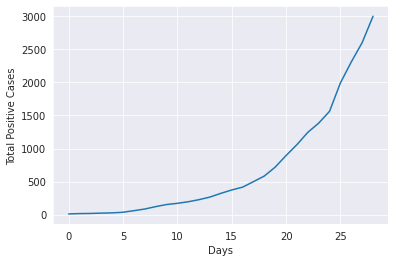

In [5]:
df_total['Total Positive Cases'].plot()
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

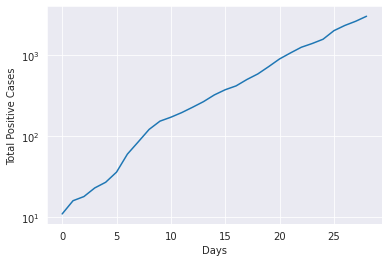

In [6]:
## same but with log y axis
df_total['Total Positive Cases'].plot(logy=True)
plt.ylabel('Total Positive Cases')
plt.xlabel('Days')
plt.show()

### Total Number of Tests Over Time

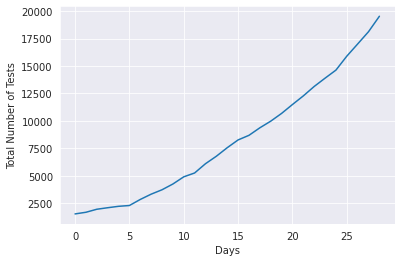

In [7]:
df_total['Total Tests'].plot()
plt.ylabel('Total Number of Tests')
plt.xlabel('Days')
plt.show()

In [8]:
num_test_per_day = df_total['Total Tests'].diff().fillna(0) + df_total['Total Tests'][0]

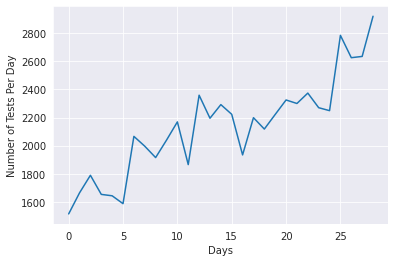

In [9]:
num_test_per_day.plot()
plt.ylabel('Number of Tests Per Day')
plt.xlabel('Days')
plt.show()

### Total number of deaths over time

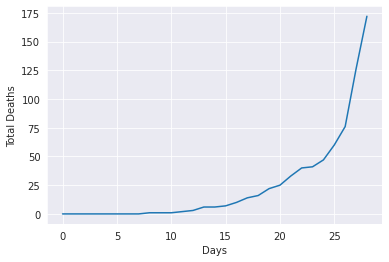

In [10]:
df_total['Total Deaths'].plot()
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

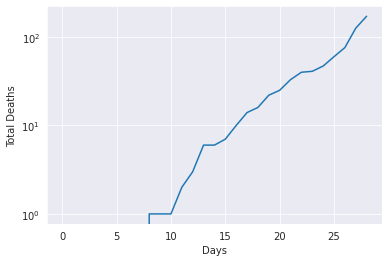

In [11]:
df_total['Total Deaths'].plot(logy=True)
plt.ylabel('Total Deaths')
plt.xlabel('Days')
plt.show()

### What is the Delay Between Recorded Cases and Deaths?

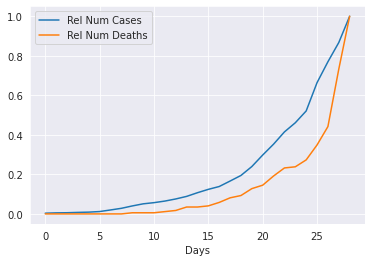

In [12]:
rel_cases = (df_total['Total Positive Cases'] / df_total['Total Positive Cases'].max())
rel_deaths = (df_total['Total Deaths'] / df_total['Total Deaths'].max())

rel_cases.plot(label='Rel Num Cases')
rel_deaths.plot(label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

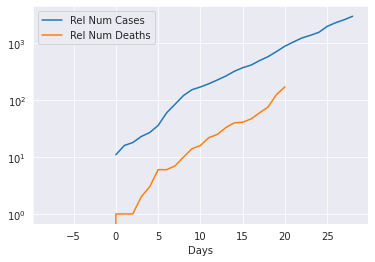

In [13]:
rel_cases = df_total['Total Positive Cases'].copy()
rel_deaths = df_total['Total Deaths'].copy()

# subtract some time off of deaths
rel_deaths.index = rel_deaths.index - 8

rel_cases.plot(logy=True, label='Rel Num Cases')
rel_deaths.plot(logy=True, label='Rel Num Deaths')

plt.xlabel('Days')
plt.legend()
plt.show()

- Deaths are perhaps roughly 8-10 days behind cases using this hand-wavy plot argument.

### What is the day on day percentage rise in cases?

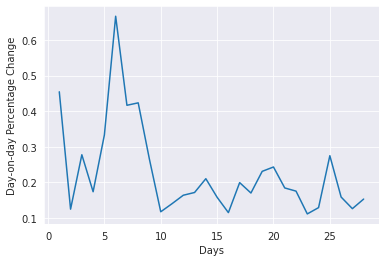

In [14]:
df_total['Total Positive Cases'].pct_change().plot()
plt.ylabel('Day-on-day Percentage Change')
plt.xlabel('Days')
plt.show()

In [15]:
df_total['Total Positive Cases'].pct_change().describe()

count    28.000000
mean      0.227626
std       0.128542
min       0.111647
25%       0.150095
50%       0.174775
75%       0.267125
max       0.666667
Name: Total Positive Cases, dtype: float64

### What is the day on day percentage rise in deaths?

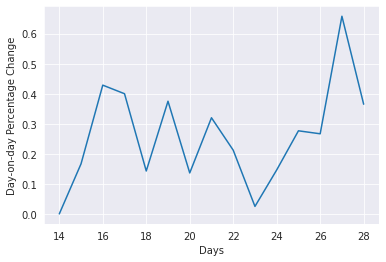

In [16]:
# remove first 13 points because they have nothing
death_pct_change = df_total['Total Deaths'].iloc[13:].pct_change()
death_pct_change.plot()
plt.ylabel('Day-on-day Percentage Change')
plt.xlabel('Days')
plt.show()

In [17]:
death_pct_change.describe()

count    15.000000
mean      0.261277
std       0.171184
min       0.000000
25%       0.144599
50%       0.266667
75%       0.370040
max       0.657895
Name: Total Deaths, dtype: float64

## Regional Statistics

### Num Cases Per Region

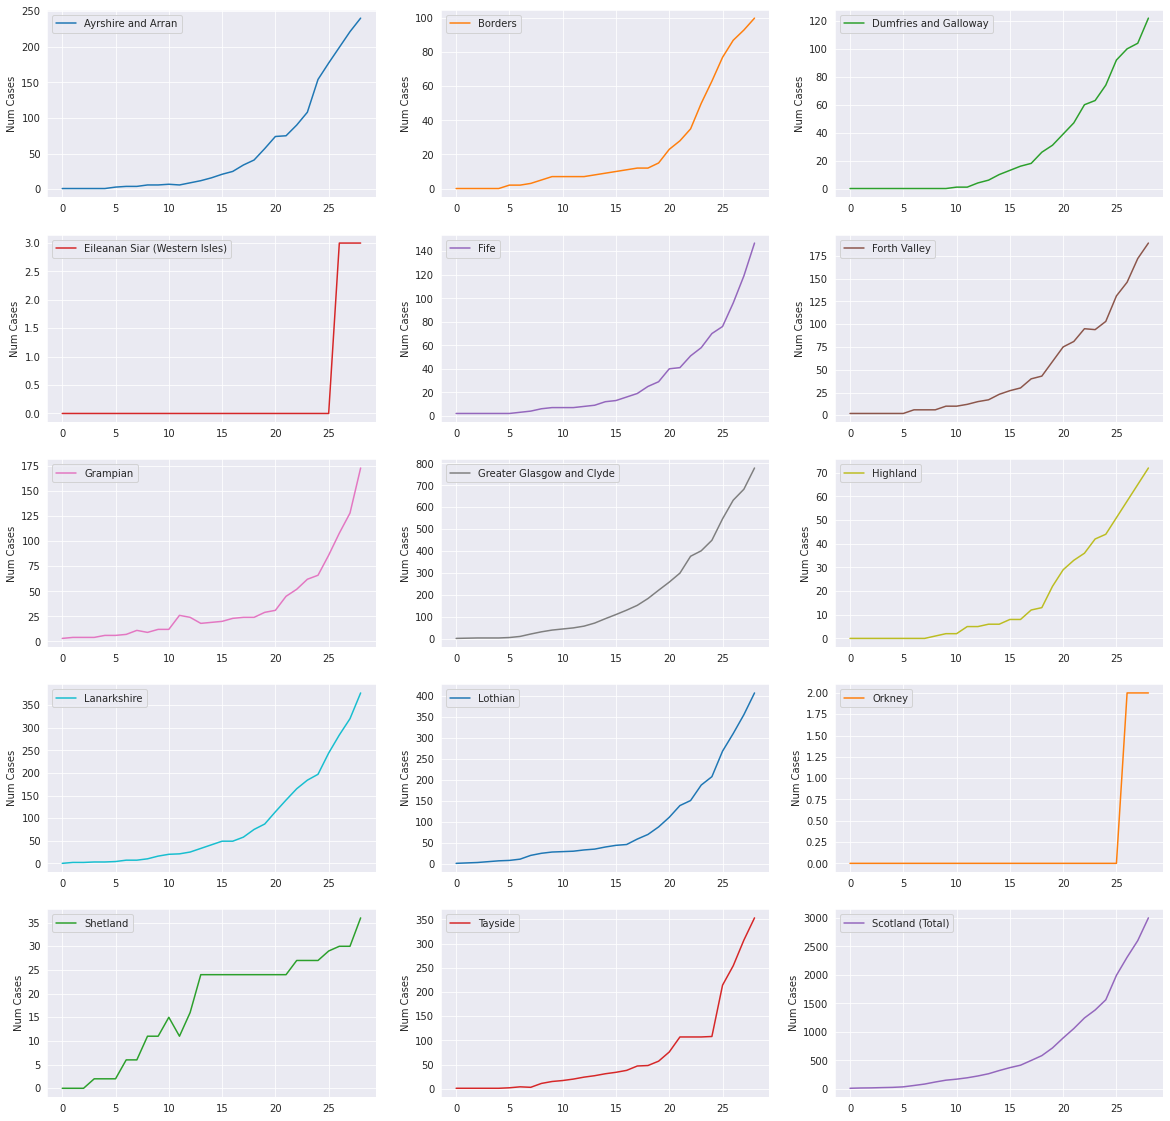

In [18]:
axes = df_cases.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

- Same again, but sharing the y axis for comparison, omitting the total so we can compare regions

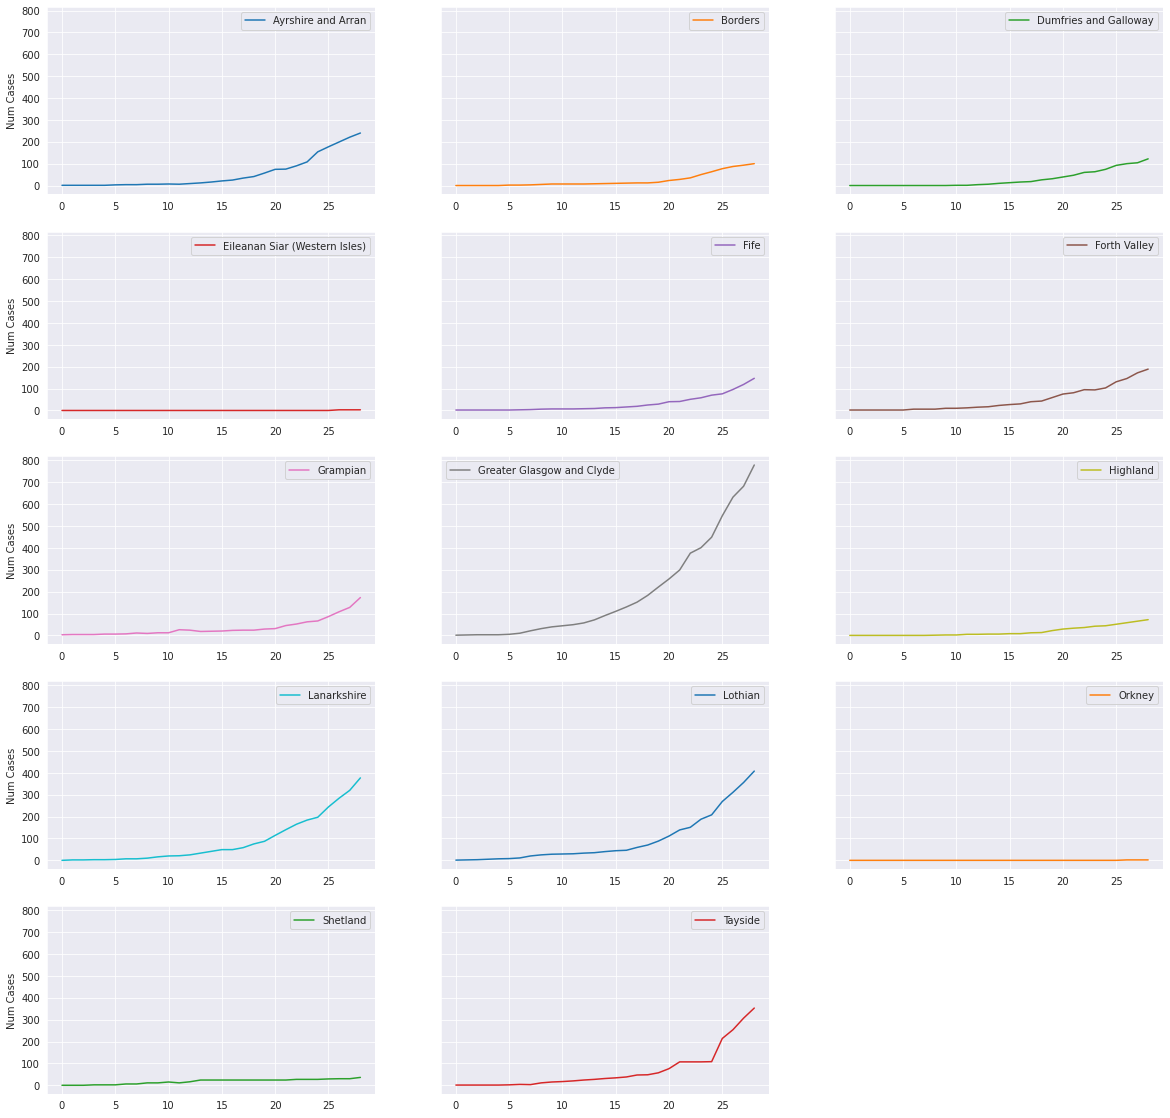

In [19]:
axes = df_cases.drop(columns='Scotland (Total)').plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases')
plt.show()

### Num Cases Per Capita Per Region

In [21]:
## make sure columns are in the right order
assert all(df_cases.columns == df_pop.index)

In [22]:
df_cases_rel = df_cases / df_pop.values.T

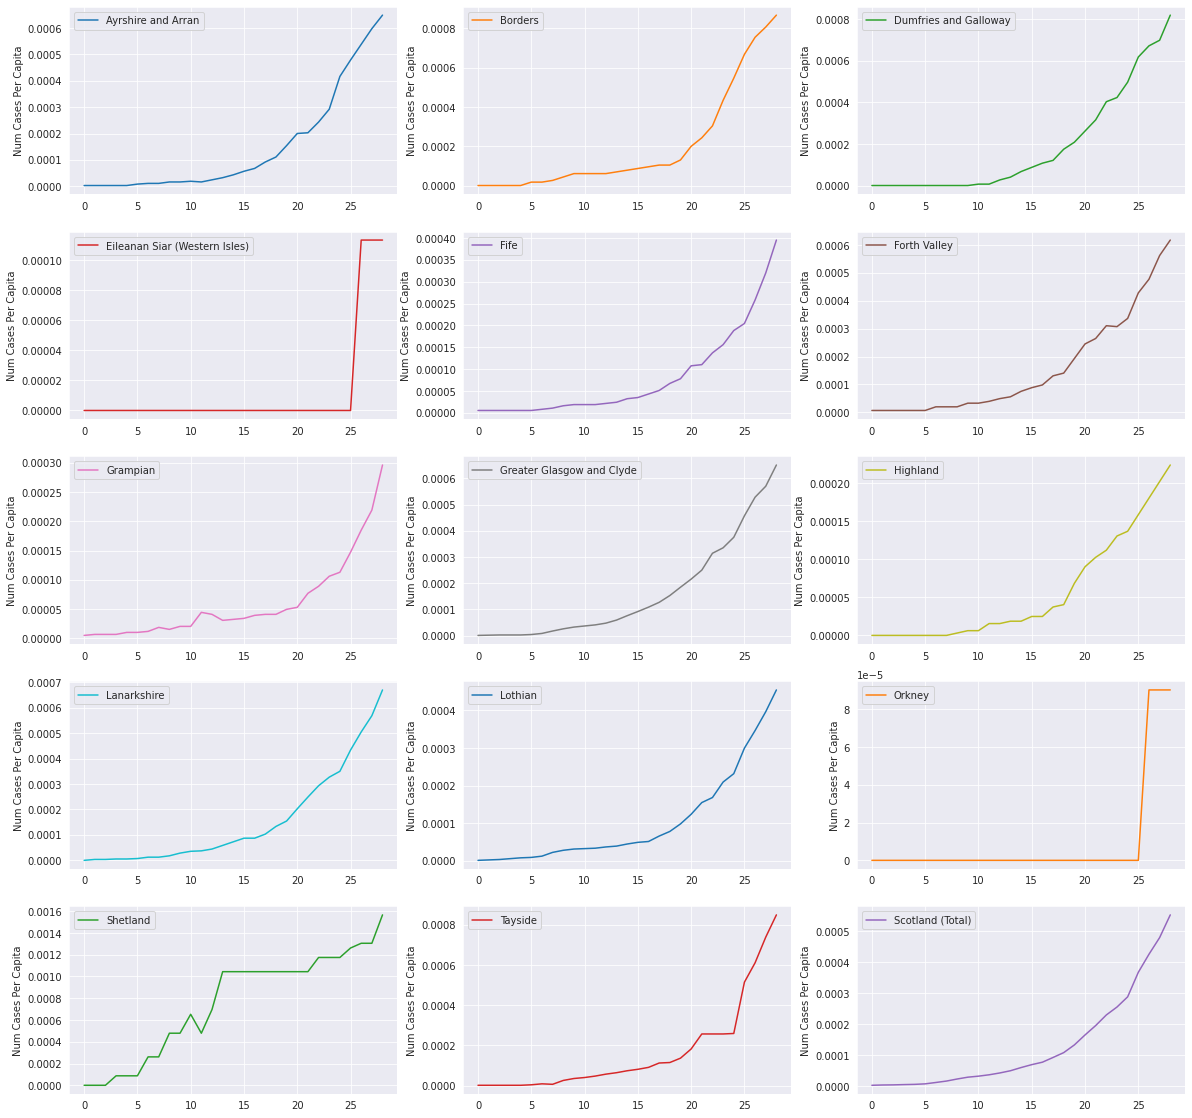

In [23]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per Capita')
plt.show()

- Same again but sharing the y axis for comparison

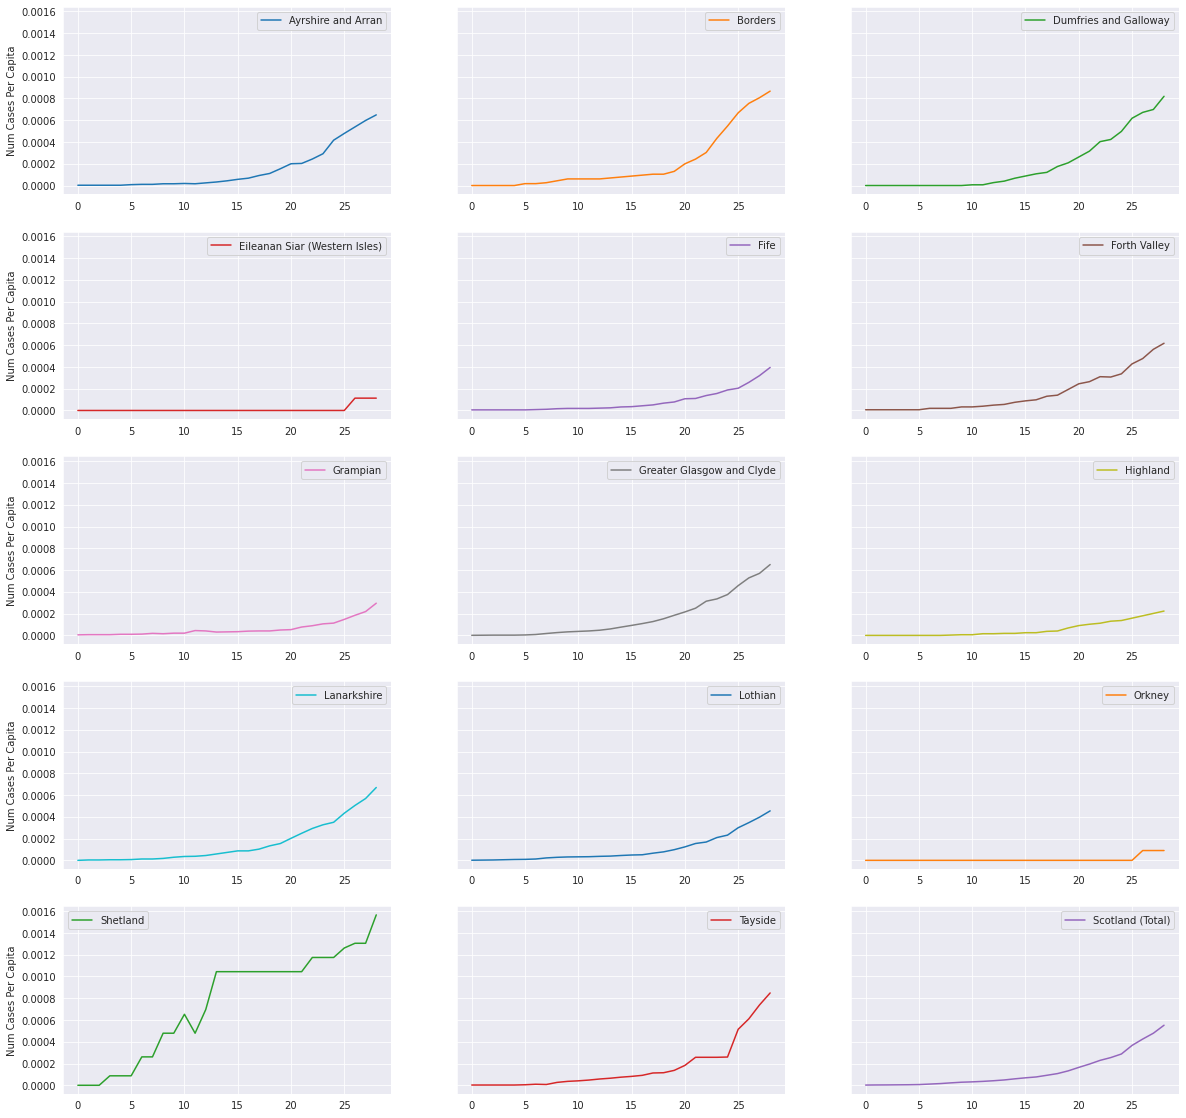

In [24]:
axes = df_cases_rel.plot(subplots=True, layout=(5, 3), figsize=(20, 20), sharey=True, sharex=False)
for ax in axes.flatten():
    ax.set_ylabel('Num Cases Per Capita')
plt.show()

### Log Growth Curves for Each Region

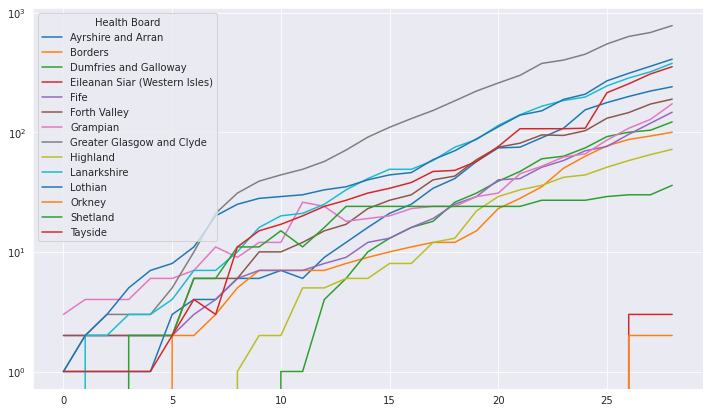

In [25]:
df_cases.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()

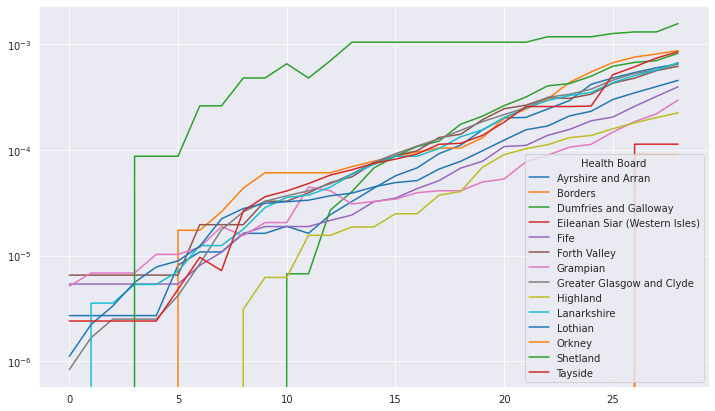

In [26]:
df_cases_rel.drop(columns='Scotland (Total)').plot(logy=True, figsize=(12, 7))
plt.show()